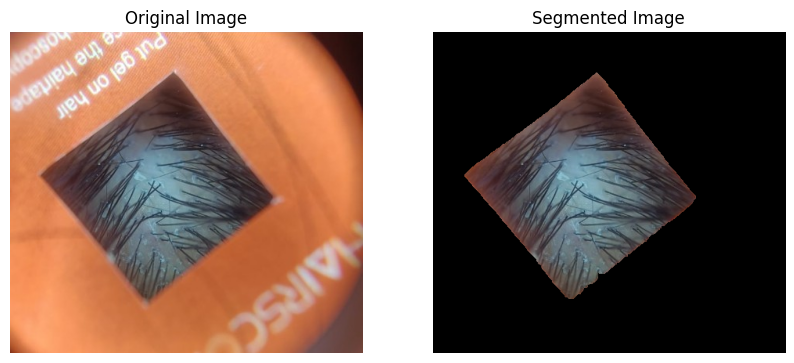

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_grabcut(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded, please check the path.")
        return

    # Convert image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours from the thresholded image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour which will be assumed to be the object
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Initialize GrabCut mask
        mask = np.zeros(image.shape[:2], np.uint8)

        # Define model storage needed by GrabCut
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        # Use the bounding rectangle as the initial rect for GrabCut
        rect = (x, y, w, h)
        cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

        # Modify the mask to ensure that the segmentation is only of the object
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        segmented = image_rgb * mask2[:, :, np.newaxis]  # Apply mask to the RGB image

        # Plot the original and segmented images using matplotlib
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(segmented)
        plt.title('Segmented Image')
        plt.axis('off')

        plt.show()
    else:
        print("No significant contours found.")


img_path = r"C:\Users\prita\Downloads\full.jpg"  # Ensure to adjust this path as needed
apply_grabcut(img_path)
